In [35]:
%reload_ext watermark
%watermark -a "Addi Wei" -d -t -v -p numpy,pandas,matplotlib.pyplot -g

Addi Wei 2019-03-24 20:31:43 

CPython 3.7.0
IPython 6.5.0

numpy 1.15.4
pandas 0.23.4
matplotlib.pyplot 2.2.3
Git hash:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#data below used for EDA and feature engineering

#df_aisles = pd.read_csv('aisles.csv')
df_dept = pd.read_csv('departments.csv')
df_order_products_prior = pd.read_csv('order_products__prior.csv')
df_orders = pd.read_csv('orders.csv')
df_products = pd.read_csv('products.csv')

#data below used for training and testing model
df_train = pd.read_csv('order_products__train_cap.csv')
df_test = pd.read_csv('order_products__test_cap.csv')




In [4]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
df_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,36,39612,1,0
1,36,19660,2,1
2,36,49235,3,0
3,36,43086,4,1
4,36,46620,5,1


In [9]:
df_test.head()

,order_id,product_id
0,1,49302
1,1,11109
2,1,10246
3,1,49683
4,1,43633


In [10]:
#observe types of data 
print(df_dept.dtypes)
print(df_order_products_prior.dtypes)
print(df_orders.dtypes)
print(df_products.dtypes)

department_id     int64
department       object
dtype: object
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object


In [11]:
print(df_dept.isnull().sum())

department_id    0
department       0
dtype: int64


In [12]:
print(df_order_products_prior.isnull().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [13]:
print(df_orders.isnull().sum())
# this was only data that contained null values.
print(df_orders.shape)
print(df_orders.days_since_prior_order.isnull().sum() / len(df_orders.index))
# 6 % of data has null values - let's drop the nulls

df_orders.dropna()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
(3421083, 7)
0.06027594185817766


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0
10,1187899,1,train,11,4,8,14.0


In [14]:
print(df_products.isnull().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


In [15]:
# Thanks to Kaggle data, not too much missing data we have to deal with, move on to some EDA
# CEO wants to know the most popular items and best departments

#merge products with prior orders in order to get product names

# df_all_orders = pd.concat([df_order_products_prior, df_train])


In [16]:
# add in product name, department name, userID to our df_all

df_all = pd.merge(df_order_products_prior, df_products, how='left', on='product_id')
df_all = pd.merge(df_all, df_dept, how='left', on='department_id')
df_all = pd.merge(df_all, df_orders, how='left', on='order_id')

In [17]:
#see product name associated w/ orders 
df_all.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,pantry,202279,prior,3,5,9,8.0


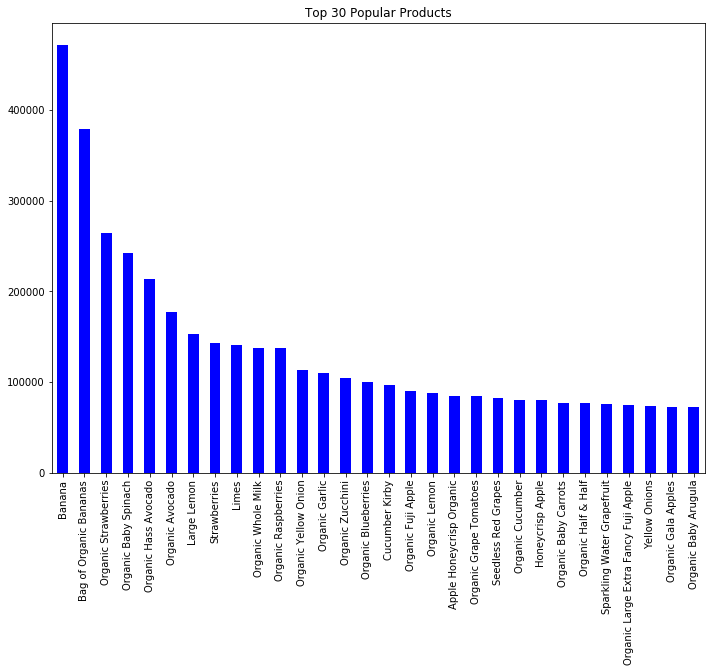

In [18]:
product_counts = df_all['product_name'].value_counts()

dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
product_counts[0:30].plot(kind="bar", color='blue')

plt.xticks(rotation=90)
plt.title('Top 30 Popular Products')
plt.show()

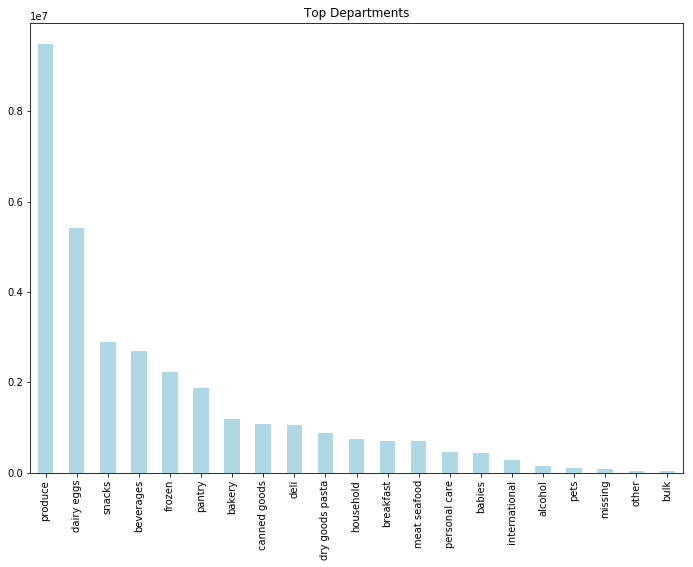

In [19]:
# Top 30 departments 

dept_counts = df_all['department'].value_counts()

dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
dept_counts[0:30].plot(kind="bar", color='lightblue')

plt.xticks(rotation=90)
plt.title('Top Departments')
plt.show()

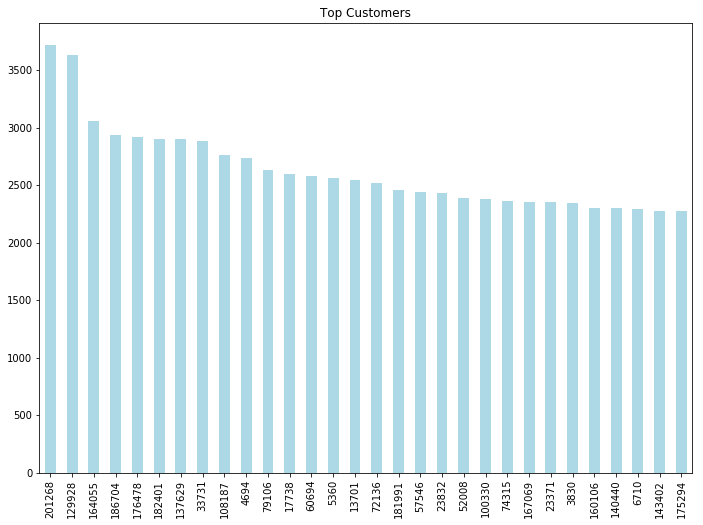

In [20]:
#Assuming user ID = customer ID, here are top 30 customers in terms of products ordered.  Maybe send a coupon their way. 

user_counts = df_all['user_id'].value_counts()

dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
user_counts[0:30].plot(kind="bar", color='lightblue')

plt.xticks(rotation=90)
plt.title('Top Customers')
plt.show()


<Figure size 432x288 with 0 Axes>

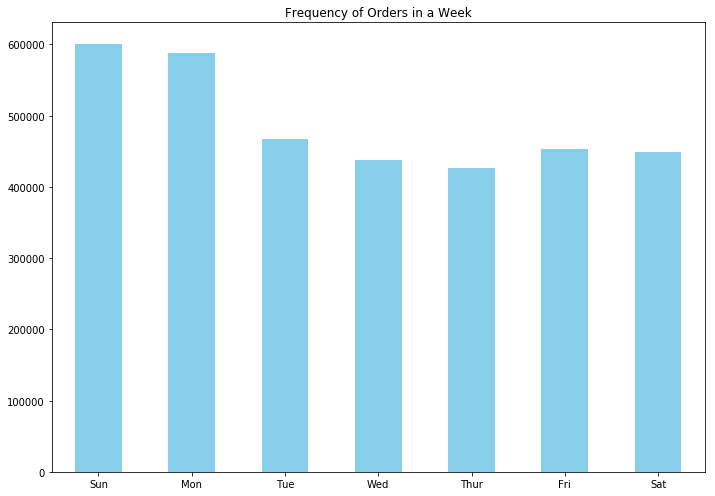

In [34]:


reorder_dow_freq = df_orders['order_dow'].value_counts().sort_index()
reorder_dow_freq.index=['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']
fig = plt.figure()
dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
reorder_dow_freq.plot(kind='bar', color="skyblue")
plt.xticks(rotation=0)
plt.title('Frequency of Orders in a Week')
plt.show()


<Figure size 432x288 with 0 Axes>

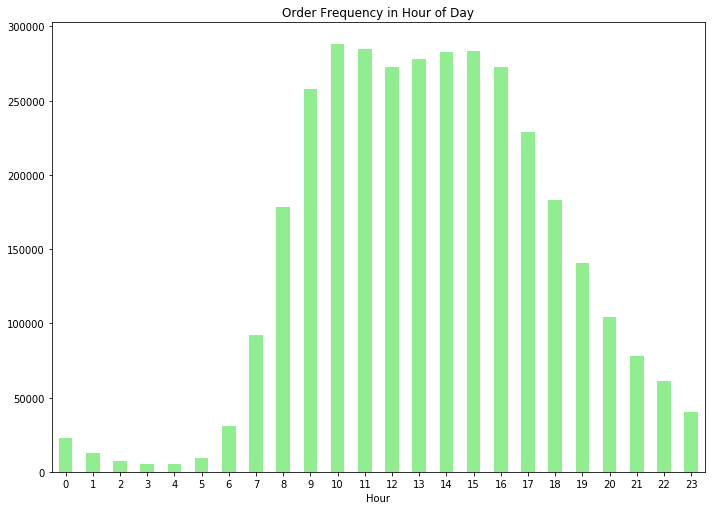

In [30]:

reorder_hour_of_day_freq = df_orders['order_hour_of_day'].value_counts().sort_index()

fig = plt.figure()
dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
reorder_hour_of_day_freq.plot(kind='bar', color="lightgreen")
plt.axvline(reorder_hour_of_day_freq.mean(), 
            linestyle='dashed', linewidth=2)
plt.xticks(rotation=0)
plt.title('Order Frequency in Hour of Day')
plt.xlabel('Hour')
plt.show()

<Figure size 432x288 with 0 Axes>

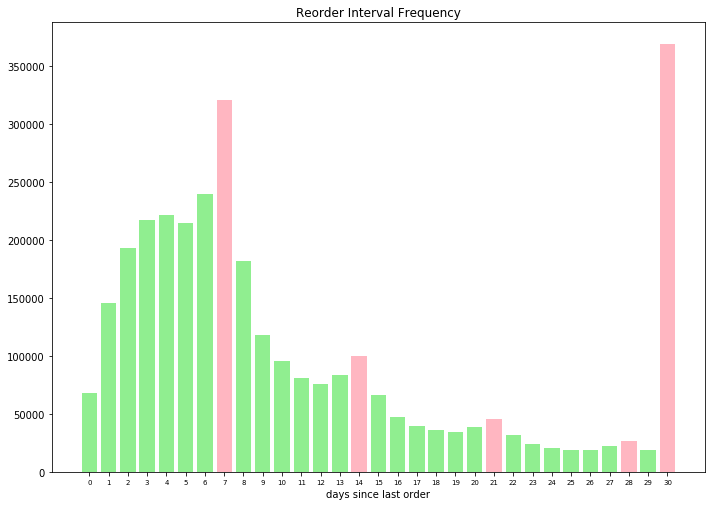

In [33]:
order_interval_count = df_orders.groupby('days_since_prior_order')['order_id'].agg('count')

fig = plt.figure()
dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
color_list = ['lightgreen'] * len(order_interval_count.index)
summit  = [7,14,21,28,30] 
for i in summit:
    color_list[i] = 'lightpink'
    
plt.bar(order_interval_count.index, order_interval_count, color=color_list)
plt.xticks(np.arange(len(order_interval_count.index)), rotation=0,fontsize=7)
plt.xlabel('days since last order')
plt.title('Reorder Interval Frequency')
plt.show()
fig.set_dpi(200)